<a href="https://colab.research.google.com/github/Pengyu-gis/UrbanSound/blob/main/rs_land_cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use the Pre-Trained LoveDA Model in Colab

In [1]:
!pip install torchgeo

# 2. Load the LoveDA Dataset Using TorchGeo:
Once TorchGeo is installed, you can use its LoveDA dataset class to load images and masks for training or inference.

In [1]:
from torchgeo.datasets import LoveDA

# Load the dataset for urban and rural scenes
dataset = LoveDA(split='val', scene=['urban', 'rural'], download=True)

# Check the size of the dataset
print(f"Number of samples in LoveDA: {len(dataset)}")


100%|██████████| 2425958254/2425958254 [02:05<00:00, 19401596.11it/s]


Extracting data/Val.zip to data
Number of samples in LoveDA: 1669


# 3. Use a Pre-Trained Model for Inference:
TorchGeo provides the ability to work with pre-trained models for segmentation tasks. You can load a pre-trained model and run inference on your dataset or new remote sensing images.

In [ ]:
import torch
from torchgeo.models import FarSeg

# Load the pre-trained FarSeg model
model = FarSeg(backbone='resnet50', classes=16, backbone_pretrained=True)

# Set the model to evaluation mode
model.eval()


# 4. Preprocess Remote Sensing Images:
Just like in previous steps, preprocess the remote sensing images before passing them to the model.

In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define preprocessing: resize, to tensor, and normalize
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),   # Resize the image to the expected size
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess a remote sensing image
img_path = '/content/drive/MyDrive/SoundingEarth/data/images/18.jpg'  # Replace with your remote sensing image path
img = Image.open(img_path)

# Preprocess the image and move to GPU
img_t = preprocess(img).unsqueeze(0).to(device)  # Add batch dimension and move to GPU

# Example: Print the shape of the tensor and confirm it's on the GPU
print(f"Image Tensor Shape: {img_t.shape}")
print(f"Device: {img_t.device}")


Image Tensor Shape: torch.Size([1, 3, 512, 512])
Device: cuda:0


# 5. Perform Inference on Remote Sensing Data:
Run the model on the preprocessed image to classify the different land-use/land-cover types (building, road, water, etc.).

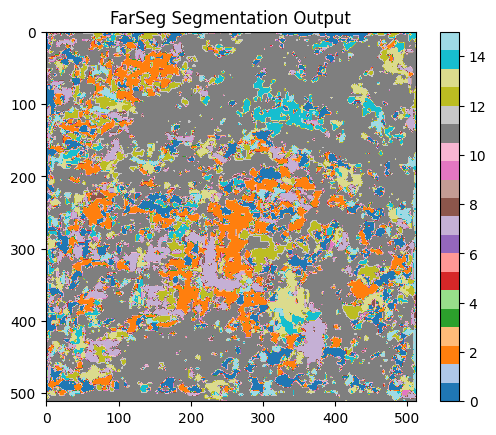

In [21]:
import torch

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model.to(device) # Added this line to move the model to the GPU

with torch.no_grad():
    output = model(img_t)

# Get the predicted class for each pixel
pred = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

# Display the segmentation result
import matplotlib.pyplot as plt
plt.imshow(pred, cmap='tab20')
plt.title('FarSeg Segmentation Output')
plt.colorbar()
plt.show()

# 6. Analyze the Classification Results:
After segmenting the remote sensing image, you can calculate class percentages (e.g., how much of the image is covered by buildings, vegetation, etc.).

In [22]:
import numpy as np

# Count the number of pixels for each class
unique, counts = np.unique(pred, return_counts=True)

# Calculate the percentage of each class
total_pixels = np.sum(counts)
class_percentages = {f"Class {cls}": count / total_pixels * 100 for cls, count in zip(unique, counts)}

print("Class Percentages:", class_percentages)


Class Percentages: {'Class 0': 10.27374267578125, 'Class 2': 12.36419677734375, 'Class 3': 0.0019073486328125, 'Class 7': 7.0026397705078125, 'Class 8': 0.51422119140625, 'Class 9': 0.18157958984375, 'Class 11': 49.69825744628906, 'Class 12': 5.74493408203125, 'Class 13': 5.6842803955078125, 'Class 14': 4.67987060546875, 'Class 15': 3.8543701171875}


# London


In [26]:
import pandas as pd

# Load metadata
metadata_path = '/content/drive/MyDrive/SoundingEarth/data/metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows
metadata.head()

,key,short_key,longitude,latitude,altitude,description,date_recorded,date_uploaded,creator,licenseurl,title,mp3name,mp3mb,mp3seconds,mp3channels,mp3bitrate,mp3samplerate
0,aporee_34015_39117,39117,4.318867,50.844867,36.0,The Ambiance of Metro Station Jacques Brel: Pe...,2016-10-15 16:00:00,2016-11-15 11:07:42,kemeny.daniel@gma...,http://creativecommons.org/publicdomain/mark/1.0/,"Inside Metro Station Jaques Brel, 1070 Anderle...",L28danielmetroJB.mp3,4.186944,202.080000,2,165579,48000
1,aporee_13525_15777,15777,10.176017,36.793692,11.0,On a small alley inside the souks area at a re...,2012-05-05 16:50:00,2013-02-22 05:58:08,Frank Schulte,http://creativecommons.org/publicdomain/mark/1.0/,"Tourbet El Bey, Tunis, Tunesien - tunis, souks...",Tunissouksautomaticprayer.mp3,1.318288,41.068500,2,256000,44100
2,aporee_9682_11591,11591,-94.776649,36.592652,237.0,Early morning birds.,2011-04-10 06:42:00,2013-02-21 18:22:54,the_bee@comca...,http://creativecommons.org/licenses/by-sa/3.0/,Lakewood Village Park,soundwalk6amgroveok.mp3,7.004366,437.768000,2,128000,44100
3,aporee_46141_52420,52420,120.600865,23.836124,59.0,"Farmland next to bamboo forest,Bird sound,Worm...",2019-08-27 06:11:00,2019-09-03 10:12:23,"Wu,Tsan-Cheng",http://creativecommons.org/licenses/by-nc-nd/3.0/,"大彎站,Ershui Township, Changhua County - Farmlan...",soundmap2019082773.mp3,15.926784,398.067200,2,320000,48000
4,aporee_31148_35816,35816,-76.760616,44.459393,137.0,Recorded on Sharp 722 portable MD recorder.Ste...,2004-04-20 20:10:00,2016-03-02 11:09:54,Andrzej Maciejewski,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Moscow, ON, Canada - Frogs along Long Swamp Road.",MD128005RD01.mp3,3.066880,136.853333,2,179167,44100


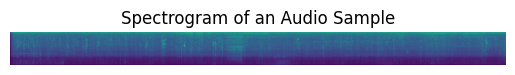

In [36]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Specify the path to the spectrograms
spectrograms_dir = '/content/drive/MyDrive/SoundingEarth/data/spectrograms'

# List the available spectrogram files
spectrogram_files = os.listdir(spectrograms_dir)

# Display one spectrogram image
image_path = os.path.join(spectrograms_dir, spectrogram_files[0])
img = Image.open(image_path)

# Plot the spectrogram
plt.imshow(img)
plt.axis('off')
plt.title('Spectrogram of an Audio Sample')
plt.show()


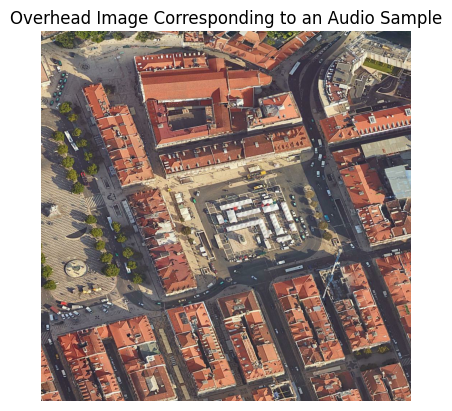

In [28]:
# Specify the path to the images
images_dir = '/content/drive/MyDrive/SoundingEarth/data/images'

# List the available image files
image_files = os.listdir(images_dir)

# Display one image
image_path = os.path.join(images_dir, image_files[0])
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.title('Overhead Image Corresponding to an Audio Sample')
plt.show()


In [33]:
# Define the bounding box for London (latitude and longitude range)
london_bbox = {
    'min_lat': 51.2868,  # Southern boundary
    'max_lat': 51.6919,  # Northern boundary
    'min_lon': -0.5103,  # Western boundary
    'max_lon': 0.3340    # Eastern boundary
}

# Filter metadata for audio recordings in London
london_data = metadata[
    (metadata['latitude'] >= london_bbox['min_lat']) &
    (metadata['latitude'] <= london_bbox['max_lat']) &
    (metadata['longitude'] >= london_bbox['min_lon']) &
    (metadata['longitude'] <= london_bbox['max_lon'])
]

# Display the first few rows of London data
london_data.head()


,key,short_key,longitude,latitude,altitude,description,date_recorded,date_uploaded,creator,licenseurl,title,mp3name,mp3mb,mp3seconds,mp3channels,mp3bitrate,mp3samplerate
133,aporee_16724_19465,19465,-0.127705,51.530209,34.0,At lunchtime during the In The Field symposium...,2013-02-16 13:16:00,2013-02-22 17:15:31,Richard Fair,http://creativecommons.org/publicdomain/mark/1.0/,British Library Cafe - Can We Steal Your Chair?,CanWeStealYourChair.mp3,3.158561,197.064036,1,128000,44100
197,aporee_10047_11991,11991,0.035209,51.483843,32.0,NaN,2011-05-07 10:05:00,2013-02-21 19:30:47,alas23/sala,http://creativecommons.org/licenses/by-sa/3.0/,"Charlton, Saturday morning",somwhereincharlton.mp3,8.239020,205.975500,2,320000,44100
504,aporee_7902_9653,9653,-0.366932,51.659982,NaN,NaN,2010-08-16 10:00:00,2013-02-21 13:03:56,TonyW,http://creativecommons.org/licenses/by-sa/3.0/,Outside reception at Purcell School,Justoutsidereception.mp3,2.412668,60.228571,2,320000,44100
639,aporee_5676_7147,7147,-0.123414,51.516132,35.0,Sounds inside the White Hart pub. Claims to b...,2009-11-13 12:42:16,2013-07-23 11:54:04,Dave Ackrill,http://creativecommons.org/licenses/by-sa/3.0/,"White Hart, London",WhiteHartinLondonClaimstobeOldestLicencedPremi...,1.160760,72.454580,2,128000,44100
746,aporee_37024_42425,42425,-0.131843,51.500445,15.0,Building work on the corner of Queen Anne's Ga...,2017-06-27 12:40:00,2017-07-01 10:07:57,Toby Cottrell,http://creativecommons.org/publicdomain/mark/1.0/,"Queen Anne's Gate and Dartmouth Street, London...",20170627QueenAnnsGateandDartmouthStreet.mp3,7.440720,231.591104,2,256834,48000


In [34]:
# Get the spectrogram filenames for London from the filtered metadata
london_spectrogram_filenames = london_data['short_key'].tolist()

# Verify how many spectrograms are from London
print(f'Number of spectrograms from London: {len(london_spectrogram_filenames)}')

# Example: Print the first few filenames
london_spectrogram_filenames[:5]


Number of spectrograms from London: 332


[19465, 11991, 9653, 7147, 42425]

In [39]:
# Assuming there's a column in metadata that links to the spectrograms, e.g., 'spectrogram_filename'
metadata[['short_key', 'latitude', 'longitude']].head()

,short_key,latitude,longitude
0,39117,50.844867,4.318867
1,15777,36.793692,10.176017
2,11591,36.592652,-94.776649
3,52420,23.836124,120.600865
4,35816,44.459393,-76.760616


In [41]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt


In [49]:
# Function to load and process the spectrogram image
def process_spectrogram(image_path):
    img = Image.open(image_path).convert("RGB")  # Open and convert to RGB
    img_t = transform(img)  # Apply transformations
    img_t = img_t.unsqueeze(0)  # Add batch dimension
    return img_t

# Function to extract features using ResNet
def extract_features(image_tensor):
    with torch.no_grad():  # No need to calculate gradients for feature extraction
        features = resnet50(image_tensor)
    return features.squeeze().numpy()  # Remove batch dimension and return as numpy array

# Load and process a sample spectrogram
image_path = '/content/drive/MyDrive/SoundingEarth/data/spectrograms/21.jpg'  # Change to an actual image path
image_tensor = process_spectrogram(image_path)

# Extract features
features = extract_features(image_tensor)

# Check the shape of the extracted features
print("Extracted features shape:", features.shape)


Extracted features shape: (2048,)


In [50]:
# Function to extract features for spectrograms specific to London
def extract_features_for_london_spectrograms(filenames, spectrogram_dir):
    feature_list = []
    skipped_files = []

    for file_name in filenames:
        try:
            # Add the .jpg extension to the filename
            img_path = os.path.join(spectrogram_dir, f"{file_name}.jpg")

            # Try loading and processing the image
            img_t = process_spectrogram(img_path)  # Preprocess the image
            features = extract_features(img_t)  # Extract features using ResNet
            feature_list.append(features)

        except FileNotFoundError:
            # If the file is not found, log it and skip
            print(f"File not found, skipping: {img_path}")
            skipped_files.append(file_name)

    return np.array(feature_list), skipped_files

# Extract features only for London spectrograms
london_spectrogram_features, skipped_files = extract_features_for_london_spectrograms(london_spectrogram_filenames, spectrograms_dir)

# Check the shape of the extracted feature matrix for London
print(f'London spectrogram features shape: {london_spectrogram_features.shape}')
print(f'Skipped {len(skipped_files)} files.')


London spectrogram features shape: (332, 2048)
Skipped 0 files.


# 7 Batch Process All Remote Sensing Images
We will process all remote sensing images in your director, classify the land cover using the pre-trained FarSeg model, and calculate the percentages of each land cover class for every image.

In [54]:
# Function to classify RS images specific to London
def classify_rs_images_for_london(filenames, rs_dir):
    rs_feature_list = []
    skipped_files = []

    for file_name in filenames:
        try:
            # Add the .jpg extension to the filename
            img_path = os.path.join(rs_dir, f"{file_name}.jpg")

            # Try loading and processing the image (similar to how you process RS images)
            pred = classify_image(img_path)  # Assuming classify_image() processes an image
            class_percentages = calculate_class_percentages(pred)  # Calculate class percentages
            rs_feature_list.append(class_percentages)  # Store the classification

        except FileNotFoundError:
            # If the file is not found, log it and skip
            print(f"File not found, skipping: {img_path}")
            skipped_files.append(file_name)

    return np.array(rs_feature_list), skipped_files

# Directory for RS images
rs_dir = '/content/drive/MyDrive/SoundingEarth/data/images'

# Process RS images only for London
london_rs_classifications, skipped_rs_files = classify_rs_images_for_london(london_spectrogram_filenames, rs_dir)

# Check the shape of the extracted classifications for London RS images
print(f'London RS classifications shape: {london_rs_classifications.shape}')
print(f'Skipped {len(skipped_rs_files)} RS files.')


London RS classifications shape: (332,)
Skipped 0 RS files.


In [61]:
# Adjust PCA to reduce spectrogram features to 12 dimensions
pca = PCA(n_components=12)
reduced_spectrogram_features = pca.fit_transform(london_spectrogram_features)

print(f"Reduced spectrogram feature shape: {reduced_spectrogram_features.shape}")


Reduced spectrogram feature shape: (332, 12)


In [62]:
# Filter out the background class (assuming it is 'Class 0' in the land cover dictionary)
def filter_land_cover_classes(land_cover):
    filtered_land_cover = {cls: val for cls, val in land_cover.items() if cls != 'Class 0'}
    return filtered_land_cover

# Apply the filter to the land cover vectors
filtered_rs_classifications = [filter_land_cover_classes(lc) for lc in london_rs_classifications]


In [64]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Adjust PCA to reduce spectrogram features to 12 dimensions
pca = PCA(n_components=12)
reduced_spectrogram_features = pca.fit_transform(london_spectrogram_features)

# Now, calculate cosine similarity after dimensionality adjustment
def analyze_relationship_london_reduced(rs_classifications, reduced_spectrogram_features, filenames):
    relationships = []

    for idx, file_name in enumerate(filenames):
        land_cover = rs_classifications[idx]  # Get land cover percentages
        spectrogram_feature = reduced_spectrogram_features[idx]  # Get reduced spectrogram features

        # Convert land cover to vector
        land_cover_vector = np.array(list(land_cover.values()))

        # Check if land_cover_vector is empty and skip if so
        if len(land_cover_vector) == 0:
            print(f"Skipping file {file_name} due to empty land cover vector.")
            continue

        # Ensure both vectors have the same dimensionality
        if land_cover_vector.shape[0] != spectrogram_feature.shape[0]:
            min_dim = min(land_cover_vector.shape[0], spectrogram_feature.shape[0])
            land_cover_vector = land_cover_vector[:min_dim]
            spectrogram_feature = spectrogram_feature[:min_dim]

        # Use cosine similarity between the land cover and reduced spectrogram features
        similarity = cosine_similarity(land_cover_vector.reshape(1, -1), spectrogram_feature.reshape(1, -1))

        # Store the relationship (filename, similarity)
        relationships.append((file_name, similarity[0][0]))

    return relationships

# Analyze relationships for London data after reducing spectrogram features
london_relationships_reduced = analyze_relationship_london_reduced(filtered_rs_classifications, reduced_spectrogram_features, london_spectrogram_filenames)

# Print the first few results
print(london_relationships_reduced[:5])

[(19465, 0.2952747026028021), (11991, -0.1655132633414845), (9653, 0.2152963815220069), (7147, -0.16892840394950145), (42425, 0.1473953265757782)]


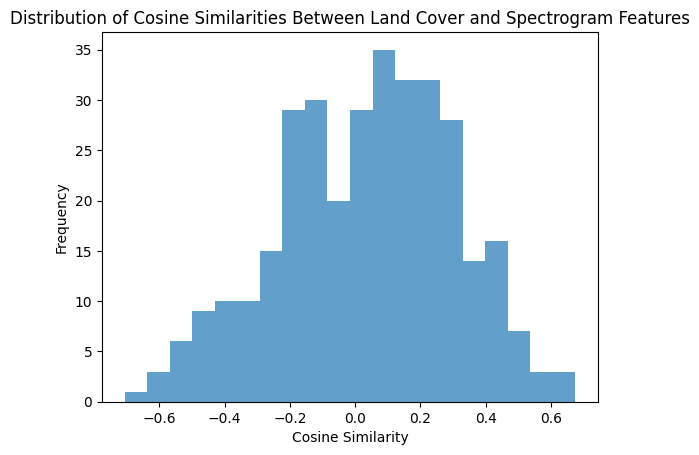

In [65]:
import matplotlib.pyplot as plt

# Extract similarities from the relationships
similarities = [rel[1] for rel in london_relationships_reduced]

# Plot the distribution of cosine similarities
plt.hist(similarities, bins=20, alpha=0.7)
plt.title('Distribution of Cosine Similarities Between Land Cover and Spectrogram Features')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()


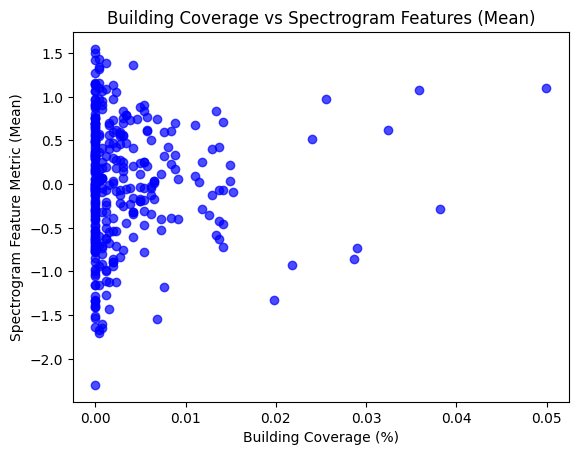

In [68]:
import matplotlib.pyplot as plt

# Extract data for scatter plot: Building percentage vs Spectrogram metric (e.g., mean of the spectrogram features)
building_percentages = [rel[1] for rel in building_relationships]
spectrogram_metrics = [rel[2] for rel in building_relationships]

# Create scatter plot
plt.scatter(building_percentages, spectrogram_metrics, alpha=0.7, color='blue')

# Add title and labels
plt.title('Building Coverage vs Spectrogram Features (Mean)')
plt.xlabel('Building Coverage (%)')
plt.ylabel('Spectrogram Feature Metric (Mean)')

# Display the plot
plt.show()


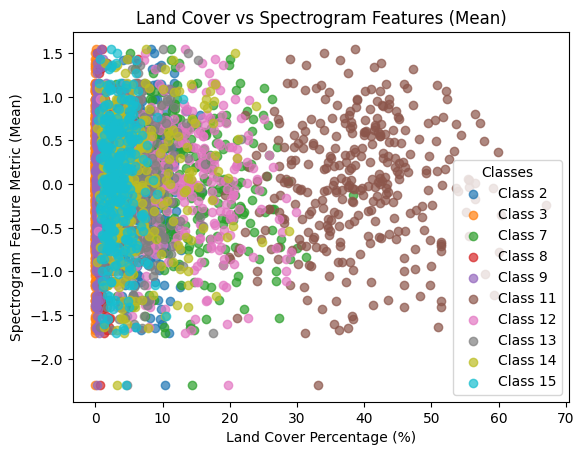

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate over each class and plot land cover percentage vs spectrogram feature metric
for class_name in filtered_rs_classifications[0].keys():  # Iterate over all classes
    class_percentages = [london_rs_classifications[idx].get(class_name, 0) for idx in range(len(london_rs_classifications))]
    spectrogram_metrics = [np.mean(reduced_spectrogram_features[idx]) for idx in range(len(reduced_spectrogram_features))]  # Using reduced features

    # Create scatter plot for each class
    plt.scatter(class_percentages, spectrogram_metrics, alpha=0.7, label=class_name)

# Add title, labels, and legend
plt.title('Land Cover vs Spectrogram Features (Mean)')
plt.xlabel('Land Cover Percentage (%)')
plt.ylabel('Spectrogram Feature Metric (Mean)')
plt.legend(title="Classes")
plt.show()


In [84]:
def analyze_specific_class_relationship(rs_classifications, spectrogram_features, class_name):
    relationships = []

    for idx, file_name in enumerate(london_spectrogram_filenames):
        land_cover = rs_classifications[idx]  # Get land cover percentages
        class_percentage = land_cover.get(class_name, 0)  # Get the percentage of the specific class
        spectrogram_feature = spectrogram_features[idx]  # Get the spectrogram features

        # Calculate some metric from the spectrogram feature (e.g., mean)
        spectrogram_metric = np.mean(spectrogram_feature)

        # Store the relationship (filename, class percentage, spectrogram metric)
        relationships.append((file_name, class_percentage, spectrogram_metric))

    return relationships

# Analyze relationship for 'Class 1' (e.g., buildings)
building_relationships = analyze_specific_class_relationship(filtered_rs_classifications, reduced_spectrogram_features, 'Class 3')

# Print the first few results
print(building_relationships[:5])


[(19465, 0.0003814697265625, -0.59480935), (11991, 0, 0.06826851), (9653, 0, -0.07475129), (7147, 0.00152587890625, -0.030720755), (42425, 0, 0.25212348)]


In [85]:
import scipy.stats as stats

# Extract building percentages and spectrogram metrics
building_percentages = [rel[1] for rel in building_relationships]
spectrogram_metrics = [rel[2] for rel in building_relationships]

# Calculate correlation coefficient
corr_coefficient, p_value = stats.pearsonr(building_percentages, spectrogram_metrics)

print(f"Pearson Correlation: {corr_coefficient}, P-value: {p_value}")


Pearson Correlation: 0.07329361108334613, P-value: 0.18278504477630603


# without PCA


In [98]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between land cover percentages of two images
def calculate_land_use_similarity(class_percentages_1, class_percentages_2):
    # Convert dict_values to list or NumPy array
    class_percentages_1 = np.array(list(class_percentages_1))
    class_percentages_2 = np.array(list(class_percentages_2))

    return cosine_similarity([class_percentages_1], [class_percentages_2])[0][0]

# Example: Calculate land use similarity between two images
land_use_similarity = calculate_land_use_similarity(london_rs_classifications[0].values(), london_rs_classifications[1].values())
print(f"Land Use Similarity: {land_use_similarity}")


Land Use Similarity: 0.9616668005145658


In [99]:
# Function to calculate cosine similarity between spectrogram features of two images
def calculate_sound_feature_similarity(spectrogram_features_1, spectrogram_features_2):
    return cosine_similarity([spectrogram_features_1], [spectrogram_features_2])[0][0]

# Example: Calculate sound feature similarity between two images
sound_feature_similarity = calculate_sound_feature_similarity(london_spectrogram_features[0], london_spectrogram_features[1])
print(f"Sound Feature Similarity: {sound_feature_similarity}")


Sound Feature Similarity: 0.8853228092193604


In [101]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Get a list of all possible classes across all images
all_classes = sorted({cls for classification in london_rs_classifications for cls in classification.keys()})

# Function to generate a class vector for an image with missing classes filled as 0
def get_class_vector(classification):
    return np.array([classification.get(cls, 0) for cls in all_classes])

# Function to calculate cosine similarity between land cover percentages of two images
def calculate_land_use_similarity(class_percentages_1, class_percentages_2):
    # Ensure both class vectors are of the same length
    class_percentages_1 = np.array(class_percentages_1)
    class_percentages_2 = np.array(class_percentages_2)

    return cosine_similarity([class_percentages_1], [class_percentages_2])[0][0]

# Example: Calculate land use similarity between two images
land_use_similarity = calculate_land_use_similarity(get_class_vector(london_rs_classifications[0]), get_class_vector(london_rs_classifications[1]))
print(f"Land Use Similarity: {land_use_similarity}")


Land Use Similarity: 0.9742549715242395


In [102]:
land_use_similarities = []
sound_feature_similarities = []

for i in range(len(london_rs_classifications)):
    for j in range(i + 1, len(london_rs_classifications)):
        # 计算土地利用相似度
        land_use_sim = calculate_land_use_similarity(get_class_vector(london_rs_classifications[i]), get_class_vector(london_rs_classifications[j]))
        land_use_similarities.append(land_use_sim)

        # 计算声音特征相似度
        sound_feature_sim = calculate_sound_feature_similarity(london_spectrogram_features[i], london_spectrogram_features[j])
        sound_feature_similarities.append(sound_feature_sim)

# 计算土地利用相似度和声音特征相似度之间的相关性
corr, p_value = pearsonr(land_use_similarities, sound_feature_similarities)
print(f"Pearson Correlation between land use and sound similarity: {corr}, P-value: {p_value}")


Pearson Correlation between land use and sound similarity: 0.07429276140184796, P-value: 4.22109043197314e-68


In [103]:
print(f"Number of land use similarities calculated: {len(land_use_similarities)}")
print(f"Number of sound feature similarities calculated: {len(sound_feature_similarities)}")


Number of land use similarities calculated: 54946
Number of sound feature similarities calculated: 54946


# another method

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 假设 y 是每个图像的土地利用百分比向量 (之前计算过的)
land_use_vectors = y  # 每个图像的土地利用向量

# 计算所有图像的土地利用相似性矩阵
land_use_similarity = cosine_similarity(land_use_vectors)

# 查看相似性矩阵
print(land_use_similarity)


[[1.         0.97906043 0.96889355 ... 0.94786169 0.96823065 0.90562698]
 [0.97906043 1.         0.96281897 ... 0.98314995 0.9918537  0.85132966]
 [0.96889355 0.96281897 1.         ... 0.90132937 0.97070921 0.95621346]
 ...
 [0.94786169 0.98314995 0.90132937 ... 1.         0.95920824 0.75689766]
 [0.96823065 0.9918537  0.97070921 ... 0.95920824 1.         0.86193396]
 [0.90562698 0.85132966 0.95621346 ... 0.75689766 0.86193396 1.        ]]


In [105]:
# 假设 X 是声音的特征向量 (之前提取的2048维特征)
sound_feature_vectors = X

# 计算所有图像的声音特征相似性矩阵
sound_similarity = cosine_similarity(sound_feature_vectors)

# 查看声音特征相似性矩阵
print(sound_similarity)


[[1.         0.88532275 0.8631526  ... 0.87412554 0.84165967 0.80852365]
 [0.88532275 0.9999997  0.8735475  ... 0.8875722  0.8779001  0.84558225]
 [0.8631526  0.8735475  0.9999999  ... 0.83890444 0.8622117  0.8630513 ]
 ...
 [0.87412554 0.8875722  0.83890444 ... 1.         0.83991975 0.8115851 ]
 [0.84165967 0.8779001  0.8622117  ... 0.83991975 1.0000001  0.89995253]
 [0.80852365 0.84558225 0.8630513  ... 0.8115851  0.89995253 1.0000004 ]]


In [106]:
import scipy.stats as stats

# 将两个相似度矩阵展平成一维数组
land_use_flat = land_use_similarity.flatten()
sound_flat = sound_similarity.flatten()

# 计算两个相似性矩阵之间的相关性
corr_coefficient, p_value = stats.pearsonr(land_use_flat, sound_flat)

print(f"Pearson Correlation: {corr_coefficient}, P-value: {p_value}")


Pearson Correlation: 0.07020045015105611, P-value: 1.953744654293801e-120


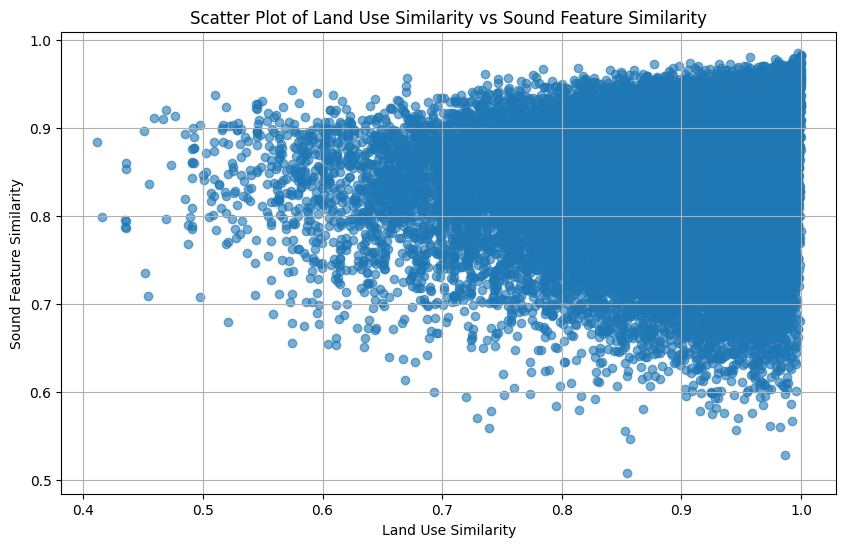

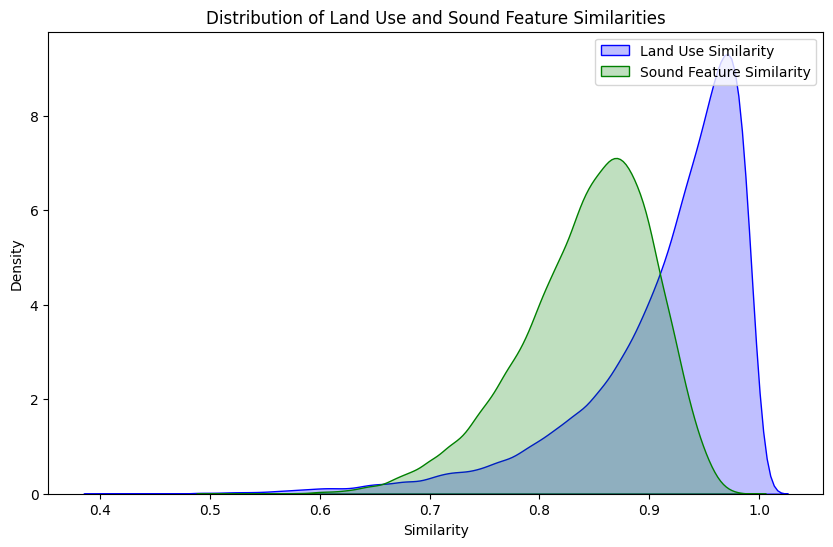

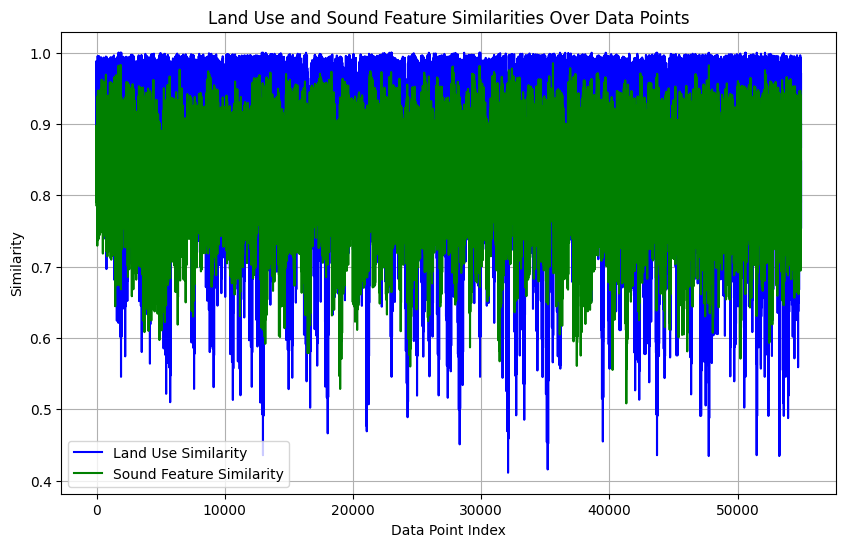

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(land_use_similarities, sound_feature_similarities, alpha=0.6)
plt.title("Scatter Plot of Land Use Similarity vs Sound Feature Similarity")
plt.xlabel("Land Use Similarity")
plt.ylabel("Sound Feature Similarity")
plt.grid(True)
plt.show()

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(land_use_similarities, label="Land Use Similarity", fill=True, color="blue")
sns.kdeplot(sound_feature_similarities, label="Sound Feature Similarity", fill=True, color="green")
plt.title("Distribution of Land Use and Sound Feature Similarities")
plt.xlabel("Similarity")
plt.ylabel("Density")
plt.legend()
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(land_use_similarities, label="Land Use Similarity", color="blue")
plt.plot(sound_feature_similarities, label="Sound Feature Similarity", color="green")
plt.title("Land Use and Sound Feature Similarities Over Data Points")
plt.xlabel("Data Point Index")
plt.ylabel("Similarity")
plt.legend()
plt.grid(True)
plt.show()


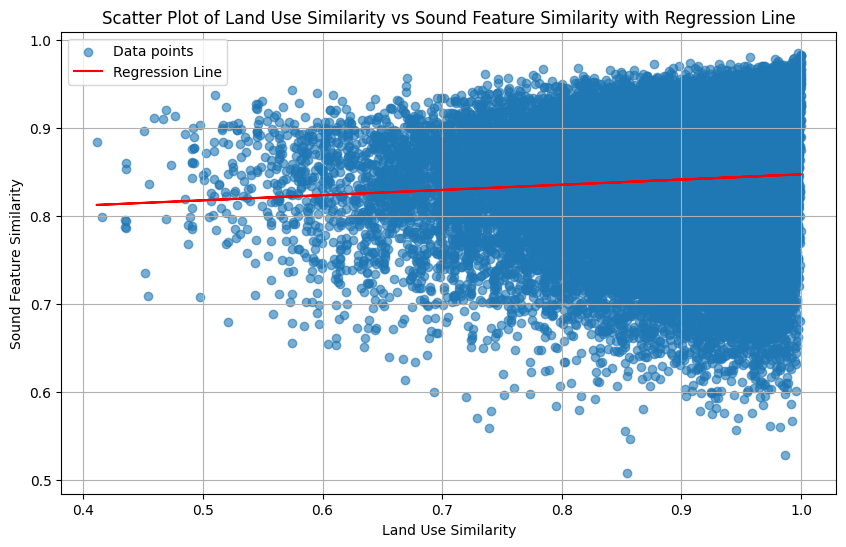

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert the lists to numpy arrays for easier computation
land_use_similarities_np = np.array(land_use_similarities).reshape(-1, 1)
sound_feature_similarities_np = np.array(sound_feature_similarities)

# Fit a linear regression model
model = LinearRegression()
model.fit(land_use_similarities_np, sound_feature_similarities_np)

# Predict values for the regression line
line = model.predict(land_use_similarities_np)

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(land_use_similarities, sound_feature_similarities, alpha=0.6, label="Data points")
plt.plot(land_use_similarities, line, color='red', label='Regression Line')
plt.title("Scatter Plot of Land Use Similarity vs Sound Feature Similarity with Regression Line")
plt.xlabel("Land Use Similarity")
plt.ylabel("Sound Feature Similarity")
plt.legend()
plt.grid(True)
plt.show()


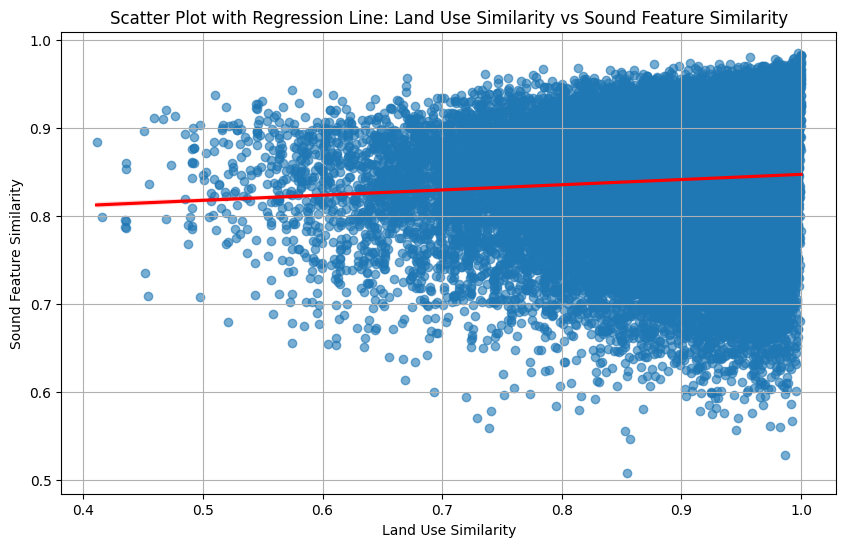

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=land_use_similarities, y=sound_feature_similarities, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Scatter Plot with Regression Line: Land Use Similarity vs Sound Feature Similarity")
plt.xlabel("Land Use Similarity")
plt.ylabel("Sound Feature Similarity")
plt.grid(True)
plt.show()
